# Reading Data interactively

In [1]:
name = input("Please enter your name: ")
print("Hello, " + name)


Please enter your name: Sherwin
Hello, Sherwin


In [10]:
#/usr/bin/env python3

def to_seconds (hours, minutes, seconds):
    return hours*3600+minutes*60+seconds

print ("Welcome to this time converter")

cont = "y"

while (cont. lower () == "y"):
    hours = int(input("Enter the number of hours: "))
    minutes = int(input ("Enter the number of minutes: "))
    seconds = int(input ("Enter the number of seconds: "))

    print ("That's {} seconds". format (to_seconds (hours, minutes, seconds))) 
    print ()
    cont = input ("Do you want to do another conversion? [y to continue] ")

print ("Good bye!")

Welcome to this time converter
Enter the number of hours: 1
Enter the number of minutes: 2
Enter the number of seconds: 3
That's 3723 seconds

Do you want to do another conversion? [y to continue] y
Enter the number of hours: 2
Enter the number of minutes: 3
Enter the number of seconds: 4
That's 7384 seconds

Do you want to do another conversion? [y to continue] 
Good bye!


# Standard Streams

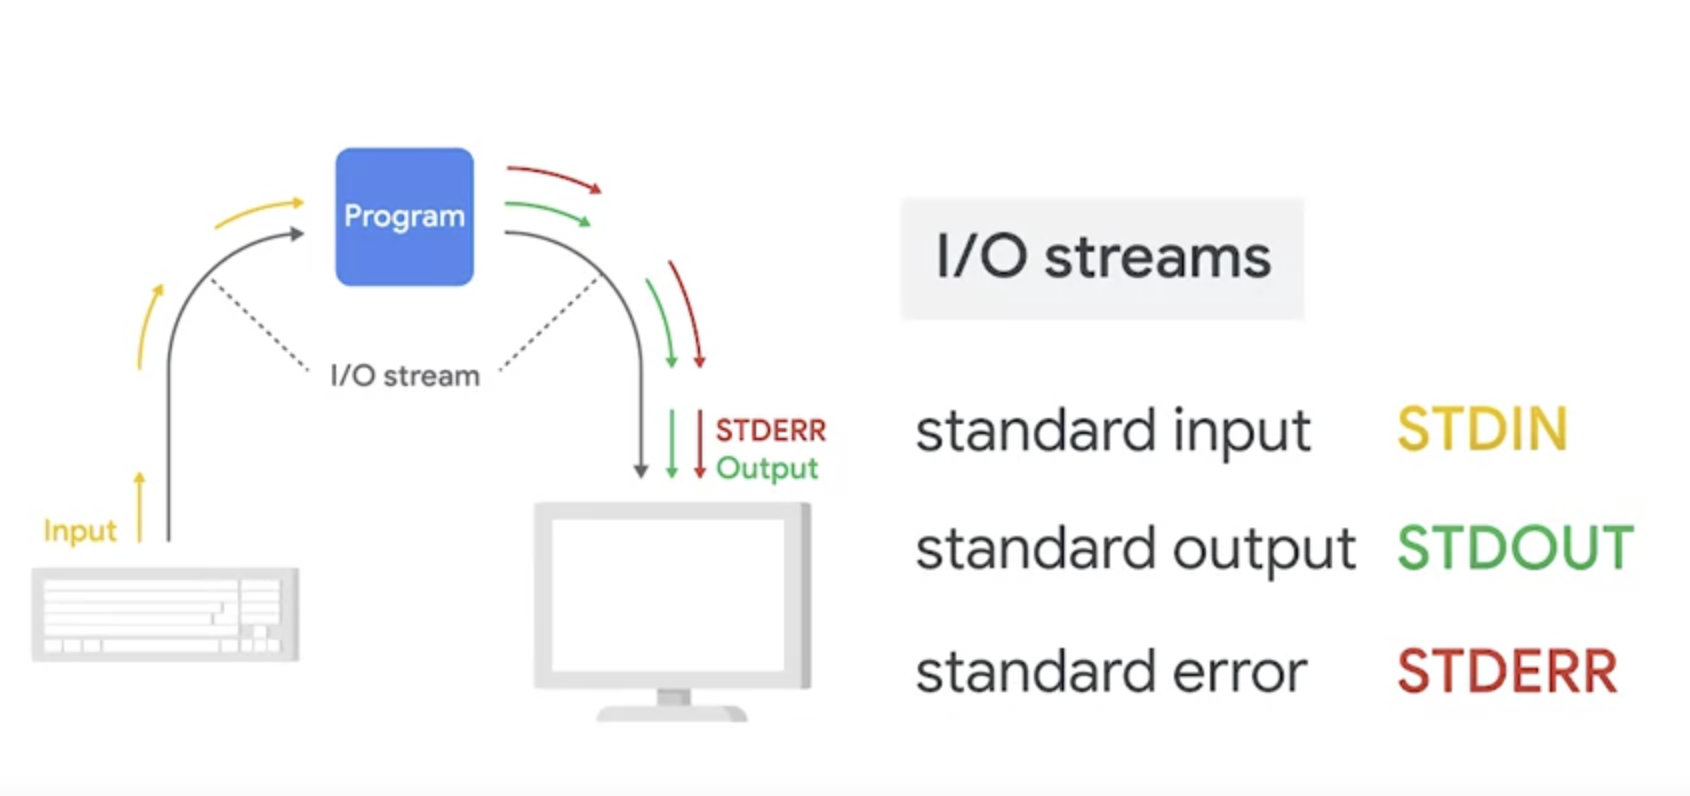

- standard input STDIN
- standard output STDOUT
- standard error STDERR

In [11]:
#!/usr/bin/env python3

data = input ("This will come from STDIN: ")
print("Now we write it to STDOUT: " + data)
print( "Now we generate an error to STDERR: " + data + 1)

This will come from STDIN: Sherwin
Now we write it to STDOUT: Sherwin


TypeError: can only concatenate str (not "int") to str

Which I/O stream is the output function using when showing an error message?
 
- STDIN

- STDOUT

- **STDERR**

- PRINT



# Environment Variables

Which directory is NOT listed in the PATH variable by default?

- /usr/local/sbin

- **/usr/sbin/temp**

- /bin

- /sbin

In [15]:
#! /usr/bin/env python3

import os

print("HOME: " + os.environ.get("HOME", ""))
print("SHELL: " + os.environ.get("SHELL", ""))
print("PATH: " + os.environ.get("PATH", ""))
print("FRUIT: " + os.environ.get("FRUIT", ""))

HOME: /Users/sherwinowen
SHELL: /bin/zsh
PATH: /Users/sherwinowen/Downloads/google-cloud-sdk/bin:/opt/homebrew/opt/mysql-client/bin:/opt/local/bin:/opt/local/sbin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Applications/VMware Fusion Tech Preview.app/Contents/Public
FRUIT: 


# Command-Line Arguments and Exit Status

**Command-line arguments**
- Parameters that are passed to a program when it's started

In [16]:
#!/usr/bin/env python3
import sys
print(sys.argv)

['/opt/homebrew/lib/python3.10/site-packages/ipykernel_launcher.py', '-f', '/Users/sherwinowen/Library/Jupyter/runtime/kernel-c6dcf5c3-c903-4df5-8994-c62104f8584f.json']


Where are the command line arguments stored?

- argv

- **sys**

- parameters.py

- print

**Exit status**
- The value returned by a program to the shell

- 0 - if runs successfully
- 1 or other number - if not

```
user@ubuntu:~$ wc variables.py
7 19 174 variables.py 

user@ubuntu: $ echo $?
0

user@ubuntu:~$ wc notpresent.py
wc: notpresent.py: No such file or directory 

user@ubuntu: $ echo $?
1
```

In [23]:
#!/usr/bin/env python3

import os
import sys

filename=sys.argv[1]

if not os.path.exists(filename):
    with open(filename, "w") as f:
        f.write("New file created\n")
else:
    print("Error, the file {} already exists!".format(filename))
    sys.exit(1)

Error, the file -f already exists!


SystemExit: 1

```
sherwinowen@Owen-MBA python % ./create_file.py sample.txt 
sherwinowen@Owen-MBA python % echo $?                    
0
sherwinowen@Owen-MBA python % ./create_file.py sample.txt 
Error, the file sample.txt already exists!
sherwinowen@Owen-MBA python % echo $?                    
1
```


# More About Input Functions

Now, you may have noticed that most of the Python code samples we've used include the line 

#!/usr/bin/env python3

Now, this is important, because it sets the Python version to Python 3.

There are some subtle differences in how data streams are handled in Python 3 and older versions, such as Python 2. Let’s just focus on input() and raw_input(), because they work differently in Python 2 and 3, and you would want to use one or the other depending on the Python version.

In Python 2

Taking an input from a user, raw_input should be used:

```
>>> my_number = raw_input('Please Enter a Number: \n')
Please Enter a Number: 
1337
>>> print(my_number)
1337
>>>
``` 

Now, this is important, because, raw_input does not evaluate an otherwise valid Python expression. In simple terms, raw_input will just get a string from a user, where input will actually perform basic maths and the like. See below:

```
>>> my_raw_input = raw_input('Please Enter a Number: \n')
Please Enter a Number: 
123 + 1  # This is treated like a raw string.
>>> my_input = input('Please Enter a Number: \n')
Please Enter a Number: 
123 + 1 # This is treated like an expression.
>>> print(my_raw_input)
123 + 1
>>> print(my_input)
124 # See that the expression was evaluated!
```

In Python 2 input(x) is just eval(raw_input(x)). eval() will just evaluate a generic string as if it were a Python expression.

In Python 3
Taking an input from a user, input should be used. See the below sample:

```
>>> my_number = input('Please Enter a Number: \n')
Please Enter a Number: 
123 + 1
>>> print(my_number)
123 + 1
>>> type(my_number)
<class 'str'>
```

Notice that the expression is treated just like a string. It is not evaluated. If we want to, we can call eval() and that will actually execute the string as an expression:

```
>>> my_number = input('Please Enter a Number: \n')
Please Enter a Number: 
123 + 1
>>> print(my_number)
123 + 1
>>> eval(my_number)
124
```

Finally, it’s worth noting, raw_input doesn’t natively exist in Python 3, but there are some tricky ways to force the interpreter to evaluate raw_input in backwards compatible ways. This can be useful for modernizing legacy Python code without rewriting large portions of it. Research on this topic is better left to the reader, as there are lots of fun (and sometimes scary) ways of doing this.

Summary
Python 2 and Python 3 handle input and raw_input differently.

In Python 2

- input(x) is roughly the same as eval(raw_input(x))

- raw_input() is preferred, unless the author wants to support evaluating string expressions.

- eval() is used to evaluate string expressions.

Standard Library Docs:

- https://docs.python.org/2/library/functions.html#input

- https://docs.python.org/2/library/functions.html#raw_input

- https://docs.python.org/2/library/functions.html#eval

In Python 3

- Input handles string as a generic string. It does not evaluate the string as a string expression.

- raw_input doesn’t exist, but with some tricky techniques, it can be supported.

- eval() can be used the same as Python 2.

Standard Library Docs: 

- https://docs.python.org/3/library/functions.html#input

- https://docs.python.org/3/library/functions.html#eval

# Practice Quiz: Data Streams

1. Which command will print out the exit value of a script that just ran successfully?

- wc variables.py

- import sys

- echo $PATH

- **echo $?**

2. Which command will create a new environment variable?

- wc

- **export**

- env

- input

3. Which I/O stream are we using when we use the input function to accept user input in a Python script?

- STDOUT

- STDERR

- **STDIN**

- SYS

4. What is the meaning of an exit code of 0?

- The program ended with an unspecified error.

- The program ended with a ValueError.

- The program ended with a TypeError.

- **The program ended successfully.**

5. Which statements are true about  input and raw_input in Python 2? (select all that apply)

- **input performs basic math operations.**

- raw_input performs basic math operations.

- **raw_input gets a string from the user.**

- input  gets a string from the user.



# Running System Commands in Python


In [28]:
import subprocess
print(subprocess.run(["date"]))

Sat Mar  4 14:42:40 PST 2023
CompletedProcess(args=['date'], returncode=0)


In [31]:
import subprocess
(subprocess.run(["sleep","5"]))

CompletedProcess(args=['sleep', '5'], returncode=0)

In [34]:
import subprocess
result = subprocess.run(["ls", "this-file_does_not_exist"]) 
print(result.returncode)

1


ls: this-file_does_not_exist: No such file or directory


# Question

A system command that sends ICMP packets can be executed within a script by using which of the following?

- **subprocess.run**

- Ping

- CompletedProcess

- Arguments

# Obtaining the Output of a System Command

In [38]:
result = subprocess.run(["host","8.8.8.8"], capture_output=True)
print(result.returncode)
print(result.stdout)
print(result.stdout.decode().split())

0
b'8.8.8.8.in-addr.arpa domain name pointer dns.google.\n'
['8.8.8.8.in-addr.arpa', 'domain', 'name', 'pointer', 'dns.google.']


# Question

Which of the following is a Unicode standard used to convert an array of bytes into a string?

- **UTF-8**

- stdout

- capture_output

- Host



In [40]:
result = subprocess.run(["rm", "does_not_exist"], capture_output=True)
print(result.returncode)
print(result.stdout)
print(result.stderr)

1
b''
b'rm: does_not_exist: No such file or directory\n'


# Advanced Subprocess Management

# Question

Which method do you use to prepare a new environment to modify environment variables?

- join

- env

- **copy**

- cwd

In [42]:
import os 
import subprocess

my_env = os.environ.copy()
my_env["PATH"] = os.pathsep.join(["/opt/myapp/", my_env["PATH"]])

result = subprocess.run(["myapp"], env=my_env)

FileNotFoundError: [Errno 2] No such file or directory: 'myapp'

# Python Subprocesses Cheat Sheet
Check out the following link for more information:

- https://docs.python.org/3/library/subprocess.html

# Quiz: Python Subprocesses

1. What type of object does a run function return?

- **CompletedProcess**

- stdout

- returncode

- capture_output

2. How can you change the current working directory where a command will be executed?

- Use the shell parameter.

- Use the capture_output parameter.

- Use the env parameter. 

- **Use the cwd parameter.**

3. When a child process is run using the subprocess module, which of the following are true? (check all that apply)

- **The child process is run in a secondary environment.**

- **The parent process is blocked while the child process finishes.**

- The parent process and child process both run simultaneously. 

- **Control is returned to the parent process when the child process ends.** 

4. When using the run command of the subprocess module, what parameter, when set to True, allows us to store the output of a system command?

- cwd

- **capture_output**

- timeout

- shell

5. What does the copy method of os.environ do?

- **Creates a new dictionary of environment variables**

- Runs a second instance of an environment

- Joins two strings

- Removes a file from a directory



# What are log files?